In [1]:
from nltk.corpus import *
from nltk.stem import *
from konlpy.tag import Kkma
from nltk.tokenize import *
from nltk.tag import *
import nltk
from keras.utils import to_categorical
import numpy as np
from keras import *
from keras.datasets import mnist
from collections import Counter
import tensorflow as tf

text="Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.[27] Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including procedural, object-oriented, and functional programming. Python is often described as a 'batteries included' language due to its comprehensive standard library.[28]"
text=sent_tokenize(text)
text

Using TensorFlow backend.


['Python is an interpreted, high-level, general-purpose programming language.',
 "Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace.",
 'Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.',
 '[27] Python is dynamically typed and garbage-collected.',
 'It supports multiple programming paradigms, including procedural, object-oriented, and functional programming.',
 "Python is often described as a 'batteries included' language due to its comprehensive standard library.",
 '[28]']

In [2]:
voc=Counter()
sentences = []
stop_words = stopwords.words('english')
for i in text:
    sentence=word_tokenize(i)
    res = []
    for word in sentence: 
        word=word.lower()
        if word not in stop_words: 
            if len(word) > 2:
                res.append(word)
                voc[word]=voc[word]+1
    sentences.append(res) 
print(sentences)

[['python', 'interpreted', 'high-level', 'general-purpose', 'programming', 'language'], ['created', 'guido', 'van', 'rossum', 'first', 'released', '1991', 'python', 'design', 'philosophy', 'emphasizes', 'code', 'readability', 'notable', 'use', 'significant', 'whitespace'], ['language', 'constructs', 'object-oriented', 'approach', 'aim', 'help', 'programmers', 'write', 'clear', 'logical', 'code', 'small', 'large-scale', 'projects'], ['python', 'dynamically', 'typed', 'garbage-collected'], ['supports', 'multiple', 'programming', 'paradigms', 'including', 'procedural', 'object-oriented', 'functional', 'programming'], ['python', 'often', 'described', "'batteries", 'included', 'language', 'due', 'comprehensive', 'standard', 'library'], []]


In [3]:
voc

Counter({'python': 4,
         'interpreted': 1,
         'high-level': 1,
         'general-purpose': 1,
         'programming': 3,
         'language': 3,
         'created': 1,
         'guido': 1,
         'van': 1,
         'rossum': 1,
         'first': 1,
         'released': 1,
         '1991': 1,
         'design': 1,
         'philosophy': 1,
         'emphasizes': 1,
         'code': 2,
         'readability': 1,
         'notable': 1,
         'use': 1,
         'significant': 1,
         'whitespace': 1,
         'constructs': 1,
         'object-oriented': 2,
         'approach': 1,
         'aim': 1,
         'help': 1,
         'programmers': 1,
         'write': 1,
         'clear': 1,
         'logical': 1,
         'small': 1,
         'large-scale': 1,
         'projects': 1,
         'dynamically': 1,
         'typed': 1,
         'garbage-collected': 1,
         'supports': 1,
         'multiple': 1,
         'paradigms': 1,
         'including': 1,
         'proc

In [4]:
voc_sorted=sorted(voc.items(), key=lambda a:a[1], reverse=True)
res={}
i=0
for (w, f) in voc_sorted:
    if f> 1:
        i+=1
        res[w]=i
print(res)

{'python': 1, 'programming': 2, 'language': 3, 'code': 4, 'object-oriented': 5}


In [5]:
from keras.preprocessing.text import Tokenizer
tok=Tokenizer()
tok.fit_on_texts(text)

In [6]:
print(tok.word_index)

{'and': 1, 'python': 2, 'is': 3, 'programming': 4, 'language': 5, 'its': 6, 'code': 7, 'object': 8, 'oriented': 9, 'to': 10, 'an': 11, 'interpreted': 12, 'high': 13, 'level': 14, 'general': 15, 'purpose': 16, 'created': 17, 'by': 18, 'guido': 19, 'van': 20, 'rossum': 21, 'first': 22, 'released': 23, 'in': 24, '1991': 25, "python's": 26, 'design': 27, 'philosophy': 28, 'emphasizes': 29, 'readability': 30, 'with': 31, 'notable': 32, 'use': 33, 'of': 34, 'significant': 35, 'whitespace': 36, 'constructs': 37, 'approach': 38, 'aim': 39, 'help': 40, 'programmers': 41, 'write': 42, 'clear': 43, 'logical': 44, 'for': 45, 'small': 46, 'large': 47, 'scale': 48, 'projects': 49, '27': 50, 'dynamically': 51, 'typed': 52, 'garbage': 53, 'collected': 54, 'it': 55, 'supports': 56, 'multiple': 57, 'paradigms': 58, 'including': 59, 'procedural': 60, 'functional': 61, 'often': 62, 'described': 63, 'as': 64, 'a': 65, "'batteries": 66, "included'": 67, 'due': 68, 'comprehensive': 69, 'standard': 70, 'libra

In [7]:
print(tok.texts_to_sequences(text))

[[2, 3, 11, 12, 13, 14, 15, 16, 4, 5], [17, 18, 19, 20, 21, 1, 22, 23, 24, 25, 26, 27, 28, 29, 7, 30, 31, 6, 32, 33, 34, 35, 36], [6, 5, 37, 1, 8, 9, 38, 39, 10, 40, 41, 42, 43, 44, 7, 45, 46, 1, 47, 48, 49], [50, 2, 3, 51, 52, 1, 53, 54], [55, 56, 57, 4, 58, 59, 60, 8, 9, 1, 61, 4], [2, 3, 62, 63, 64, 65, 66, 67, 5, 68, 10, 6, 69, 70, 71], [72]]


In [8]:
tok.word_counts.items()
words_freq=[w for w, c in tok.word_counts.items() if c <2]
words_freq


['an',
 'interpreted',
 'high',
 'level',
 'general',
 'purpose',
 'created',
 'by',
 'guido',
 'van',
 'rossum',
 'first',
 'released',
 'in',
 '1991',
 "python's",
 'design',
 'philosophy',
 'emphasizes',
 'readability',
 'with',
 'notable',
 'use',
 'of',
 'significant',
 'whitespace',
 'constructs',
 'approach',
 'aim',
 'help',
 'programmers',
 'write',
 'clear',
 'logical',
 'for',
 'small',
 'large',
 'scale',
 'projects',
 '27',
 'dynamically',
 'typed',
 'garbage',
 'collected',
 'it',
 'supports',
 'multiple',
 'paradigms',
 'including',
 'procedural',
 'functional',
 'often',
 'described',
 'as',
 'a',
 "'batteries",
 "included'",
 'due',
 'comprehensive',
 'standard',
 'library',
 '28']

In [9]:
for w in words_freq:
    del tok.word_index[w]
    del tok.word_counts[w]
print(tok.texts_to_sequences(text))
print('-'*50)
print(tok.word_index)

[[2, 3, 4, 5], [1, 7, 6], [6, 5, 1, 8, 9, 10, 7, 1], [2, 3, 1], [4, 8, 9, 1, 4], [2, 3, 5, 10, 6], []]
--------------------------------------------------
{'and': 1, 'python': 2, 'is': 3, 'programming': 4, 'language': 5, 'its': 6, 'code': 7, 'object': 8, 'oriented': 9, 'to': 10}


In [10]:
words=['java','python','ds','ds','java','java']
from nltk import FreqDist
fd=FreqDist(words)
fd.N()
fd.most_common(2)

[('java', 3), ('ds', 2)]

In [11]:
from konlpy.tag import Okt
okt=Okt()
tok=okt.morphs("나는 자연어 처리를 공부하고 있다")
tok

C:\Users\Kyujin\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['나', '는', '자연어', '처리', '를', '공부', '하고', '있다']

In [12]:
word2idx={}
for t in tok:
    print(t) 
    if i not in word2idx.keys():
        word2idx[t]=len(word2idx)
print(word2idx)

나
는
자연어
처리
를
공부
하고
있다
{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '공부': 5, '하고': 6, '있다': 7}


In [13]:
metrics=[]
def ohe(w, word2idx):
    metrics=[0]*len(word2idx)
    p=word2idx[w]
    metrics[p]=1      
    return metrics
    

In [14]:
print(ohe("공부",word2idx))

[0, 0, 0, 0, 0, 1, 0, 0]


In [15]:
text='오늘 메뉴는 뼈다귀 해장국입니다. 맛있게 먹어요. 국산이래요. 뼈다귀 최고 뼈다귀 최고'

In [16]:
from keras_preprocessing.text import Tokenizer
tok=Tokenizer()
tok.fit_on_texts([text])
tok.word_counts

OrderedDict([('오늘', 1),
             ('메뉴는', 1),
             ('뼈다귀', 3),
             ('해장국입니다', 1),
             ('맛있게', 1),
             ('먹어요', 1),
             ('국산이래요', 1),
             ('최고', 2)])

In [17]:
text2='뼈다귀 관련 음식을 가장 맛있게 먹어요'
res=tok.texts_to_sequences([text2])
res

[[1, 6, 7]]

In [18]:
vLen=len(tok.word_index)
from keras.utils import to_categorical
pres=to_categorical(res, num_classes=vLen+1)
pres

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.]]], dtype=float32)

In [37]:
from tensorflow import keras

fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

In [38]:
test_images.shape
train_images.shape

(60000, 28, 28)

In [39]:
import matplotlib.pyplot as plt

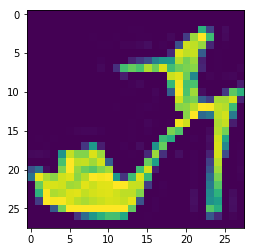

In [40]:
cur_img=np.reshape(train_images[9],(28,28))
plt.imshow(cur_img)

In [24]:
# gspark@kw.ac.kr

In [26]:
train_images = train_images/ 255
test_images = test_images/255

In [41]:
from keras import *
from keras.utils import to_categorical

In [42]:
network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [43]:
#훈련(컴파일)

network.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

In [44]:
import numpy as np

In [45]:
train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype('float32')/255 #정규화

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255


In [46]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.5592 - acc: 0.8015
Epoch 2/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.3799 - acc: 0.8606
Epoch 3/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.3367 - acc: 0.8772
Epoch 4/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.3112 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.2910 - acc: 0.8917


In [47]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('테스트 정확도:', test_acc)

10000/10000 [==============================] - 1s 61us/step
테스트 정확도: 0.8825


In [48]:
predictions = network.predict(test_images)


In [49]:
predictions[0]

array([1.0424042e-07, 1.6677361e-09, 1.7237008e-09, 1.0582982e-08,
       1.4730195e-08, 9.3499981e-03, 8.8836309e-08, 1.8081138e-02,
       4.7684371e-05, 9.7252095e-01], dtype=float32)

In [50]:
np.argmax(predictions[0])

9

In [61]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

TypeError: Invalid dimensions for image data

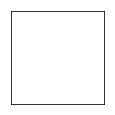

In [62]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images): 
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()